# Synthetic Data Generation

We will use a pre-tuned model to produce data. The model output should be a 3D array with condition, signaling node and time point for dimensions. The model output will be sub-sampled to produce the synthetic dataset.

In [1]:
import torch
import numpy
import bionetwork
import pandas
import matplotlib.pyplot as plt

## Run the pre-trained model

In [7]:
# Setup Parameters
N = 200
inputAmplitude = 3
projectionAmplitude = 1.2
seed = 123
torch.manual_seed(seed)
numpy.random.seed(seed)

# Load network
networkList, nodeNames, modeOfAction = bionetwork.loadNetwork('data/KEGGnet-Model.tsv')
annotation = pandas.read_csv('data/KEGGnet-Annotation.tsv', sep='\t')
bionetParams = bionetwork.trainingParameters(iterations = 150, clipping=1, leak=0.01)

inName = annotation.loc[annotation['ligand'],'code'].values
outName = annotation.loc[annotation['TF'],'code'].values
inName = numpy.intersect1d(nodeNames, inName)
outName = numpy.intersect1d(nodeNames, outName)

parameterizedModel = bionetwork.model(networkList, nodeNames, modeOfAction, inputAmplitude, projectionAmplitude, inName, outName, bionetParams)
parameterizedModel = bionetwork.loadParam('data/equationParams.txt', parameterizedModel, nodeNames)

# Generate data
X = torch.zeros(N, len(inName), dtype=torch.double)
for i in range(1, N):  # Skip 0 to include a control sample i.e. zero input
    X[i, (i-1) % len(inName)] = torch.rand(1, dtype=torch.double)  # Stimulate each receptor at least once
    X[i, numpy.random.randint(0, len(inName))] = torch.rand(1, dtype=torch.double)

Y, YfullRef, fullYFull = parameterizedModel(X)
fullYFull = fullYFull.detach()

In [11]:
fullYFull_np = fullYFull.numpy()
print(fullYFull.shape)  # dimensions: conditions, node names, states

dim1, dim2, dim3 = fullYFull_np.shape

reshaped_array = fullYFull_np.reshape(dim1 * dim2, dim3)

synthetic_data = pandas.DataFrame(reshaped_array)

index = pandas.MultiIndex.from_product([range(dim1), range(dim2)], names=['Condition', 'Signaling Node'])
synthetic_data.index = index
synthetic_data.columns = [int(i) for i in range(dim3)]

display(synthetic_data)

torch.Size([200, 409, 150])


0             1             2         3    \
Condition Signaling Node                                                       
0         0              -5.585427e-05 -5.743208e-05 -5.724134e-05 -0.000056   
          1               2.172743e-02  2.082521e-02  2.082522e-02  0.020825   
          2               1.147115e-02  1.147115e-02  1.147115e-02  0.011471   
          3              -3.048172e-04 -3.077264e-04 -3.062161e-04 -0.000306   
          4               5.414221e-07  5.544846e-07  5.544872e-07  0.000001   
...                                ...           ...           ...       ...   
199       404            -3.819515e-04 -3.820867e-04 -8.684589e-04 -0.002121   
          405             2.569240e-02  1.294253e-02  1.082021e-02  0.010811   
          406            -1.755686e-03 -1.971686e-03 -1.864701e-03 -0.001847   
          407            -1.473707e-04 -1.506498e-04 -1.506254e-04 -0.000151   
          408             5.905104e-02  5.903740e-02  5.903740e-02  0.059037   

                               4         5         6         7         8    \
Condition Signaling Node                                                     
0         0              -0.000015 -0.000015 -0.000015 -0.000015 -0.000015   
          1               0.020825  0.020825  0.020825  0.020825  0.020825   
          2               0.011471  0.011471  0.011471  0.011471  0.011471   
          3              -0.000306 -0.000306 -0.000306 -0.000306 -0.000306   
          4               0.000001  0.000001  0.000002  0.000001  0.000002   
...                            ...       ...       ...       ...       ...   
199       404            -0.002559 -0.002926 -0.002842 -0.003089 -0.002381   
          405             0.011018  0.011202  0.011421  0.078485  0.019365   
          406            -0.001847 -0.001849 -0.001850 -0.001842 -0.002414   
          407            -0.000151 -0.000151 -0.000151 -0.000151 -0.000151   
          408             0.059037  0.059037  0.059037  0.059037  0.059037   

                               9    ...       140       141       142  \
Condition Signaling Node            ...                                 
0         0              -0.000015  ... -0.000015 -0.000015 -0.000015   
          1               0.020825  ...  0.020825  0.020825  0.020825   
          2               0.011471  ...  0.011471  0.011471  0.011471   
          3              -0.000306  ... -0.000306 -0.000306 -0.000306   
          4               0.000002  ...  0.000001  0.000001  0.000001   
...                            ...  ...       ...       ...       ...   
199       404            -0.002239  ... -0.002159 -0.002159 -0.002159   
          405             0.137110  ...  0.133485  0.133485  0.133485   
          406            -0.001902  ... -0.002861 -0.002861 -0.002861   
          407            -0.000151  ... -0.000151 -0.000151 -0.000151   
          408             0.059037  ...  0.059037  0.059037  0.059037   

                               143       144       145       146       147  \
Condition Signaling Node                                                     
0         0              -0.000015 -0.000015 -0.000015 -0.000015 -0.000015   
          1               0.020825  0.020825  0.020825  0.020825  0.020825   
          2               0.011471  0.011471  0.011471  0.011471  0.011471   
          3              -0.000306 -0.000306 -0.000306 -0.000306 -0.000306   
          4               0.000001  0.000001  0.000001  0.000001  0.000001   
...                            ...       ...       ...       ...       ...   
199       404            -0.002159 -0.002159 -0.002159 -0.002159 -0.002159   
          405             0.133485  0.133485  0.133485  0.133485  0.133485   
          406            -0.002861 -0.002861 -0.002861 -0.002861 -0.002861   
          407            -0.000151 -0.000151 -0.000151 -0.000151 -0.000151   
          408             0.059037  0.059037  0.059037  0.059037  0.059037   

              

## Sub-sample synthetic data

In [54]:
n_conditions = 30
n_timepoints = 24
time_step = 3

synthetic_data_filtered = synthetic_data.iloc[:, :n_timepoints:time_step]

# Calculate the standard deviation for each condition to keep the ones with the heighest
variation = synthetic_data_filtered.groupby('Condition').std().mean(axis=1)
top_conditions = variation.nlargest(n_conditions).index
synthetic_data_filtered = synthetic_data_filtered.loc[top_conditions]


display(synthetic_data_filtered)

0         3         6         9   \
Condition Signaling Node                                               
47        0              -5.585427e-05 -0.000056 -0.000015 -0.000015   
          1               2.172743e-02  0.020825  0.020825  0.020825   
          2               1.147115e-02  0.011471  0.011471  0.011471   
          3              -3.048172e-04 -0.000306 -0.000306 -0.000306   
          4               5.414221e-07  0.000001  0.000002  0.000002   
...                                ...       ...       ...       ...   
99        404            -3.819515e-04 -0.002121 -0.002896 -0.001640   
          405             2.569240e-02  0.010811  0.011421  0.137110   
          406            -1.755686e-03 -0.001847 -0.001850 -0.001902   
          407            -1.473707e-04 -0.000151 -0.000151 -0.000151   
          408             5.905104e-02  0.059037  0.059037  0.059037   

                                12        15        18        21  
Condition Signaling Node                                          
47        0              -0.000015 -0.000015 -0.000015 -0.000015  
          1               0.020825  0.020825  0.020825  0.020825  
          2               0.011471  0.011471  0.011471  0.011471  
          3              -0.000306 -0.000306 -0.000306 -0.000306  
          4               0.000002  0.000002  0.000002  0.000002  
...                            ...       ...       ...       ...  
99        404            -0.000691 -0.000861 -0.001310 -0.001207  
          405             0.367750  0.367214  0.366913  0.369549  
          406            -0.004592 -0.004794 -0.004783 -0.004804  
          407            -0.000151 -0.000151 -0.000151 -0.000151  
          408             0.059037  0.059037  0.059037  0.059037  

[12270 rows x 8 columns]

## Plot to Evaluate

In [55]:
synthetic_data_filtered.index.get_level_values('Condition').unique()

Index([ 47,  72, 122,  15, 164,  41,  35,  26,  49, 197, 123,  96, 127,  34,
       135, 133,  94, 105,   4, 175,  88, 136,  45,  61, 128, 132,  27,  32,
        58,  99],
      dtype='int64', name='Condition')

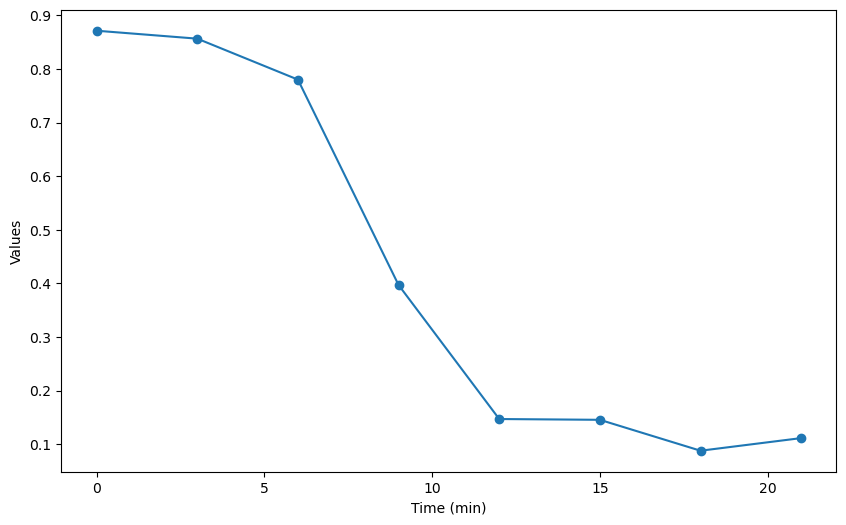

In [56]:
# Select a specific row (Condition, Signaling Node)
specific_row = synthetic_data_filtered.loc[(175, 260)]

plt.figure(figsize=(10, 6))
plt.plot(specific_row.index, specific_row.values, marker='o')
plt.xlabel('Time (min)')
plt.ylabel('Values')
plt.show()

In [53]:
synthetic_data_filtered.to_csv('data/synthetic_data.csv', index=True)